In [1]:
! pip install --upgrade pip


  Using cached pip-10.0.0-py2.py3-none-any.whl
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


In [2]:
!pip install librosa
import librosa

  Using cached joblib-0.11-py2.py3-none-any.whl
  Using cached numba-0.37.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached llvmlite-0.22.0-cp36-cp36m-manylinux1_x86_64.whl
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
  Found existing installation: llvmlite 0.16.0
    Uninstalling llvmlite-0.16.0:
      Successfully uninstalled llvmlite-0.16.0
  Found existing installation: numba 0.31.0
    Uninstalling numba-0.31.0:
      Successfully uninstalled numba-0.31.0


In [3]:
!pip install wave
!pip install soundfile

tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
  Using cached SoundFile-0.10.1-py2.py3-none-any.whl
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.


In [4]:
import soundfile as sf

In [5]:
from __future__ import print_function, division
import glob
from sklearn.model_selection import train_test_split
import thinkdsp
import thinkplot
import thinkstats2 

import numpy as np

import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = np.pi * 2
import wave
import os
import contextlib
%matplotlib inline

musicdur=4

In [30]:
styleview=['beti','lia','lotsuwalun','ramu','remu','subaru']
# styleview=['kopi','kuan']


In [57]:
# x=[]
# time=[]
# for i,c in enumerate(styleview):
#     lis=glob.glob('sounddata/'+c+'/4/*.wav')
#     data= []
#     for j in lis:    
#         w = wave.open(j, 'rb')
#         data.append( [w.getparams(), w.readframes(w.getnframes())] )
#         w.close()
#     output = wave.open('sounddata/'+c+'/'+c+'.wav', 'wb')
#     output.setparams(data[0][0])
#     for k in range(np.size(data,0)):
#         output.writeframes(data[k][1])
#     output.close()
    
    
#     f = sf.SoundFile('sounddata/'+c+'/'+c+'.wav')
    
#     time.append(len(f) / f.samplerate)

    
# xx=np.array(x)

# time1=np.array(time)


# data= []
# for i,c in enumerate(styleview):    
#     w = wave.open('sounddata/'+c+'/'+c+'.wav', 'rb')
#     data.append( [w.getparams(), w.readframes(w.getnframes())] )
#     w.close()
# output = wave.open('sounddata/all.wav', 'wb')
# output.setparams(data[0][0])
# for k in range(np.size(data,0)):
#     output.writeframes(data[k][1])
# output.close()

In [58]:
# time1

array([  25.34747917,   35.20716553,   34.876375  ,   45.813     ,
         46.25125   ,  171.86975   ])

In [12]:
# t1=0

# allin=thinkdsp.read_wave('sounddata/all.wav')
# for i,c in enumerate(styleview): 
#     print(i)
#     wave=allin.segment(start=t1,duration=time1[i])
#     wave.write('sounddata/'+c+'/'+c+'.wav')
#     t1=t1+time1[i]

0
Writing sounddata/kopi/kopi.wav
1
Writing sounddata/kuan/kuan.wav


In [31]:
import cv2
x=[]
y=[]

    
for i,c in enumerate(styleview):
    lis=glob.glob('sounddata/'+c+'/4/*.wav')
    data= []
    for k in lis: 
        X, sample_rate = librosa.load(k)
        f = sf.SoundFile(k)
        print(len(f) / f.samplerate)
        mel = librosa.feature. melspectrogram(X, sr=sample_rate)
        print(np.shape(mel))
        for j in range(mel.shape[1]-20):
    #         print(j)
            a=mel[:,j:(j+20)]

            a=(np.reshape(a,(128,20,1))).astype(np.float32)
            x.append(a)

    #         print(np.shape(x))

            yout=np.zeros(len(styleview))
            yout[i]=1
            y.append(yout)


xx1=np.array(x)
yy1=np.array(y)


2.5541875
(128, 111)
3.3988125
(128, 147)
1.5151041666666667
(128, 66)
1.3641666666666667
(128, 59)
1.9504791666666668
(128, 85)
3.4249375
(128, 148)
4.620770833333333
(128, 200)
1.79375
(128, 78)
4.725270833333333
(128, 204)
28.421224489795918
(128, 1225)
1.068125
(128, 47)
0.9404166666666667
(128, 41)
4.226041666666666
(128, 183)
0.8010833333333334
(128, 35)
1.9156458333333333
(128, 83)
3.4133333333333336
(128, 148)
5.8514375
(128, 253)
5.061958333333333
(128, 219)
11.424208333333333
(128, 493)
4.481458333333333
(128, 194)
1.92725
(128, 84)
4.156375
(128, 180)
2.049166666666667
(128, 89)
1.9040416666666666
(128, 83)
1.5731458333333332
(128, 68)
2.798
(128, 121)
4.580145833333333
(128, 198)
9.543395833333333
(128, 412)
6.188125
(128, 267)
2.229125
(128, 97)
2.9547291666666666
(128, 128)
1.161
(128, 51)
2.5309791666666666
(128, 110)
1.7589166666666667
(128, 76)
2.385854166666667
(128, 103)
4.3479375
(128, 188)
1.9214583333333333
(128, 83)
2.322
(128, 101)
3.0534166666666667
(128, 132)


In [52]:
from sklearn.utils import class_weight
import numpy as np
cw= class_weight.compute_class_weight('balanced', np.unique(np.argmax(yy1, axis=1)), np.argmax(yy1, axis=1))

In [25]:
# import cv2
# x=[]
# y=[]
# # thinkdsp.Spectrum.freq_res=20
# # thinkdsp.Spectrum.max_freq=5000
# for i,c in enumerate(styleview):
#     lis=glob.glob('sounddata/'+c+'/train/*.wav')
#     print(i)
#     for j in lis[:150]:
# #         print(j)

# #         kx=[]
# #         X, sample_rate = librosa.load('sounddata/'+c+'/'+c+'.wav')
# #         mel = librosa.feature. melspectrogram(X, sr=sample_rate)
# #         mel = cv2.resize(mel, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
# #         print(np.shape(mel)) 
# #         a=(np.reshape(mel,(128,128,1))).astype(np.float32)
# #         x.append(a)
# #         print(np.shape(x))
        
#         yout=np.zeros(len(styleview))
#         yout[i]=1
#         y.append(yout)
# # xx1=np.array(x)
# yy1=np.array(y)


0
1


10616.063

In [16]:
xx1.savetxt('train1.csv',delimiter=",")
yy1.savetxt('ans1.csv',delimiter=",")

AttributeError: 'numpy.ndarray' object has no attribute 'save_txt'

In [57]:
# xtr,xv,ytr,yv=train_test_split(xx1,yy1,train_size=0.5,shuffle=True)

In [68]:
type(xx1)

numpy.ndarray

In [111]:
np.shape(xv)

(7680, 128, 20, 1)

In [87]:
import keras

In [101]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(64, (3, 3), padding='same',input_shape=(128, 20, 1)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,1)))
# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,1)))
# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, (10, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,1)))
# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, (10, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,1)))
# model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(128, (20, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2,1)))
# model.add(keras.layers.Dropout(0.3))



model.add(keras.layers.Flatten())

# model.add(keras.layers.Dense(50,activation='relu'))
# model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(len(styleview),activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 128, 20, 64)       640       
_________________________________________________________________
activation_136 (Activation)  (None, 128, 20, 64)       0         
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 64, 20, 64)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 64, 20, 128)       73856     
_________________________________________________________________
activation_137 (Activation)  (None, 64, 20, 128)       0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 32, 20, 128)       0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 32, 20, 128)       491648    
__________

In [102]:
from keras.preprocessing.image import ImageDataGenerator

In [103]:
opt = keras.optimizers.Adam(lr=0.001)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    shear_range=0.2, 
    zoom_range=0.2)  # randomly flip images

###little aug
datagen_aug_small = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False,)

# earlystop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

Using real-time data augmentation.


In [13]:
import keras.backend as K
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, UpSampling2D
from keras.applications.vgg16 import VGG16

In [14]:
# K.clear_session()

# model.add(keras.layers.Flatten())

# basenet = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(pix, pix, colors))
modelf = keras.models.Sequential()
modelf.add(keras.layers.Conv2D(3, (3, 3), padding='same',input_shape=(128, 20, 1)))
modelf.add(keras.layers.Activation('relu'))
# modelf.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelf.add(UpSampling2D((2, 7 )))
print(modelf.summary())
# input_tensor = Input(shape=(128, 20, 1))
# upsampled = 
# inputlayer=Conv2D(3, (3, 2), padding='same',input_shape=(128, 20, 1))(upsampled)

basenet = InceptionV3( include_top=False )(modelf.output)
# basenet = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 140, 3))

# basenet =VGG16(input_tensor=upsampled)
# for layer in basenet.layers[:10]:
#     layer.trainable = False

# model.add(keras.layers.Conv2D(64, (3, 3), padding='same',input_shape=(pix, pix, 1)))
# model.add(keras.layers.Activation('relu'))
# model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))    
# input_tensor = Input(shape=(7, 7, 3))
# upsampled = UpSampling2D((32, 32))(input_tensor)
# VGG = VGG16(input_tensor=upsampled)
# print(basenet.summary())

x = GlobalAveragePooling2D()(basenet)


print(1)
predictions = Dense(len(styleview), activation="softmax")(x)  
print(2)
# model = Model(inputs=modelf.input, outputs=modelf.output)
model = Model(inputs=modelf.input, outputs=predictions)
print(3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 20, 3)        30        
_________________________________________________________________
activation_6 (Activation)    (None, 128, 20, 3)        0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 256, 140, 3)       0         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
None
1
2
3


In [78]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input, UpSampling2D

modelf = keras.models.Sequential()
modelf.add(keras.layers.Conv2D(3, (3, 3), padding='same',input_shape=(128, 20, 1)))
modelf.add(keras.layers.Activation('relu'))
# modelf.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelf.add(UpSampling2D((2, 7 )))
print(modelf.summary())

basenet = VGG16( include_top=False )(modelf.output)


x = GlobalAveragePooling2D()(basenet)


print(1)
predictions = Dense(len(styleview), activation="softmax")(x)  
print(2)
# model = Model(inputs=modelf.input, outputs=modelf.output)
model = Model(inputs=modelf.input, outputs=predictions)
print(model.summary())
print(3)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1701 (Conv2D)         (None, 128, 20, 3)        30        
_________________________________________________________________
activation_1691 (Activation) (None, 128, 20, 3)        0         
_________________________________________________________________
up_sampling2d_28 (UpSampling (None, 256, 140, 3)       0         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
None
1
2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1701_input (InputLaye (None, 128, 20, 1)        0         
_________________________________________________________________
conv2d_1701 (Conv2D)         (None, 128, 20, 3)        30        
_________________________________________________________________
activ

In [79]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    shear_range=0.2, 
    zoom_range=0.2)  # randomly flip images

###little aug
datagen_aug_small = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,)

# earlystop
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [104]:
from keras.callbacks import ReduceLROnPlateau

In [114]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)

model_history = model.fit(xx1, yy1,epochs=15,validation_data=(xv, yv),class_weight=cw,callbacks=[reduce_lr])

Train on 13833 samples, validate on 1249 samples
Epoch 1/15
13833/13833 [==============================] - 11s 781us/step - loss: 2.7501e-05 - acc: 1.0000 - val_loss: 1.6980 - val_acc: 0.8399
Epoch 2/15
13833/13833 [==============================] - 11s 796us/step - loss: 2.1018e-05 - acc: 1.0000 - val_loss: 1.7118 - val_acc: 0.8391
Epoch 3/15
13833/13833 [==============================] - 11s 788us/step - loss: 1.4845e-05 - acc: 1.0000 - val_loss: 1.7277 - val_acc: 0.8391
Epoch 4/15
13833/13833 [==============================] - 11s 792us/step - loss: 1.0864e-05 - acc: 1.0000 - val_loss: 1.7449 - val_acc: 0.8391
Epoch 5/15
13833/13833 [==============================] - 11s 787us/step - loss: 8.4367e-06 - acc: 1.0000 - val_loss: 1.7522 - val_acc: 0.8391
Epoch 6/15
13833/13833 [==============================] - 11s 784us/step - loss: 6.1036e-06 - acc: 1.0000 - val_loss: 1.7632 - val_acc: 0.8391
Epoch 7/15
13833/13833 [==============================] - 11s 796us/step - loss: 5.1479e-06 -

In [ ]:
model.save('temp_model')

In [82]:
np.shape(xt)

(0,)

In [32]:
import cv2
xt=[]
yt=[]

for i,c in enumerate(styleview):
    X, sample_rate = librosa.load('sounddata/'+c+'/test/5_1.wav')
    mel = librosa.feature. melspectrogram(X, sr=sample_rate)
    print(np.shape(mel))
    for j in range(0,mel.shape[1]-20):
#         print(j)
        a=mel[:,j:(j+20)]
#         print(np.shape(a))
        a=(np.reshape(a,(128,20,1))).astype(np.float32)
        xt.append(a)
        
#         print(np.shape(x))
        
        yout=np.zeros(len(styleview))
        yout[i]=1
        yt.append(yout)
   

xxt=np.array(xt)
yyt=np.array(yt)
np.shape(xxt)
# 

(128, 1495)
(128, 1262)
(128, 1989)
(128, 879)
(128, 221)
(128, 6760)


(12486, 128, 20, 1)

In [33]:
xte,xv,yte,yv=train_test_split(xxt,yyt,train_size=0.9,shuffle=True)

In [17]:
model.evaluate( xte, yte, batch_size=40, verbose=1, sample_weight=None, steps=None)

13212/13212 [==============================] - 4s 272us/step


[1.000307362173638, 0.82689978888350257]

TypeError: `inputs` should be a list or tuple.

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
def predict_classes(self, x, batch_size=32, verbose=1):
    '''Generate class predictions for the input samples
    batch by batch.
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        batch_size: integer.
        verbose: verbosity mode, 0 or 1.
    # Returns
        A numpy array of class predictions.
    '''
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
    if proba.shape[-1] > 1:
        return proba.argmax(axis=-1)
    else:
        return (proba > 0.5).astype('int32')

In [25]:
def print_confusion_matrix(label_y, pred_x, names):
    cm = confusion_matrix(np.argmax(label_y, axis=1), model.predict_classes(pred_x))
#     cm = confusion_matrix(np.argmax(label_y, axis=1), predict_classes(model,pred_x))
#     cm = confusion_matrix(np.argmax(label_y, axis=1),np.argmax(model.predict(pred_x)))
    plot_confusion_matrix(cm, names)

In [26]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix'):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    cm2 = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(12, 10))
#     plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.imshow(cm2, interpolation='nearest', cmap=plt.get_cmap('Reds'))
    plt.title('{0} {1:.2%}'.format(title, cm.trace()/cm.sum()))
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    

    thresh = cm.max() / 2
    thresh2=cm2.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0} ({1:.2%})".format(cm[i, j], cm2[i,j]), horizontalalignment="center",
                 color="white" if cm2[i, j] > thresh2 else "black")

    plt.show()

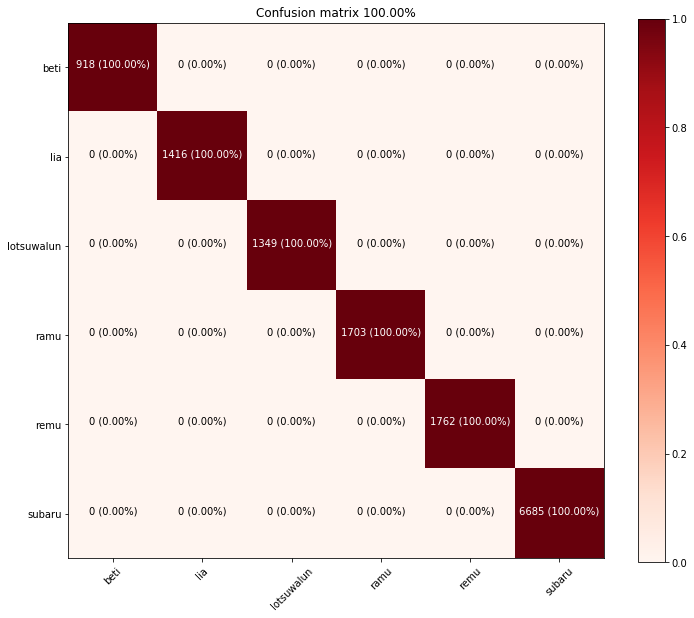

In [110]:
print_confusion_matrix(yy1, xx1, styleview)

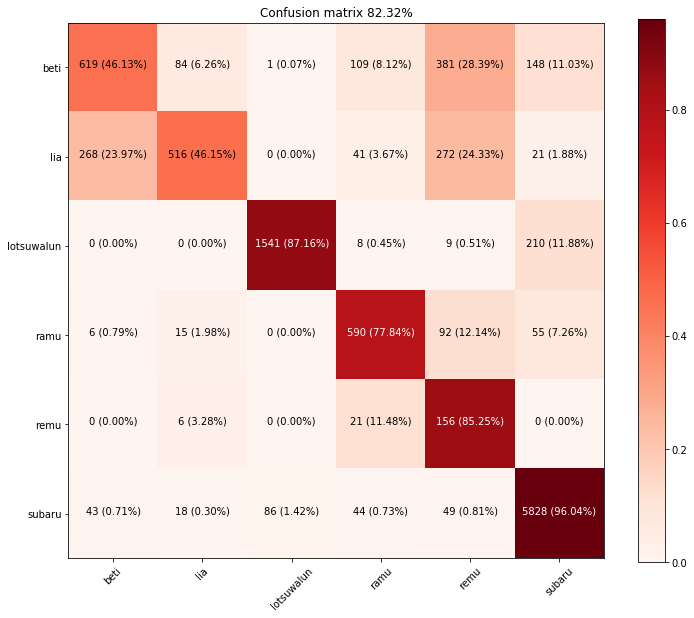

In [112]:
# import matplotlib.pyplot as plt
# plt.subplot(211)

# plt.subplot(212)
print_confusion_matrix(yte, xte, styleview)
